I decided to treat this as a classification problem by creating a new binary variable affair
(did the woman have at least one affair?) and trying to predict the classification for each
woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.


Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =
college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =
"white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

Code to loading data and modules

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data

dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Text(0,0.5,'Frequency')

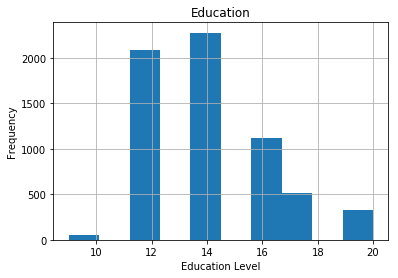

In [25]:
############################## DATA VISUALIZATION ####################################

%matplotlib inline

dta.educ.hist()
plt.title("Education")
plt.xlabel("Education Level")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

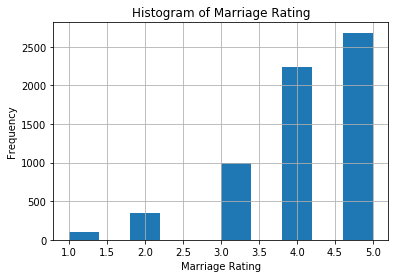

In [14]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

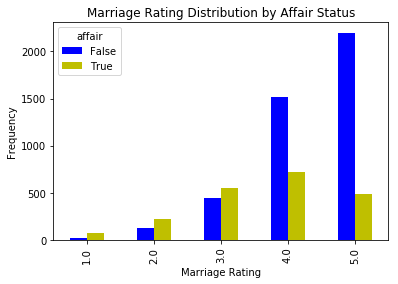

In [75]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind= 'bar', color=['b','y'])
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [29]:
######################### DATA PRE-PROCESSING #######################

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")


# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# flatten y into a 1-D array
y = np.ravel(y)

In [30]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [31]:
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [32]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X,y)
# check the accuracy on the training set
model.score(X, y)

0.72588752748978946

In [35]:
model.coef_

array([[ 1.48983606,  0.1880664 ,  0.49894812,  0.25066814,  0.839008  ,
         0.83390825,  0.19063622,  0.2978329 ,  0.16140914,  0.18777109,
         0.19401647, -0.70311973, -0.05841813,  0.10567669,  0.01691983,
        -0.37113512,  0.00401584]])

In [41]:
dff = pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))),columns =['Feature', 'Coefficient'])
dff

,Feature,Coefficient
0,Intercept,[1.48983605706]
1,occ_2,[0.188066396597]
2,occ_3,[0.498948122561]
3,occ_4,[0.250668143692]
4,occ_5,[0.839008001119]
5,occ_6,[0.833908248282]
6,occ_husb_2,[0.190636224249]
7,occ_husb_3,[0.297832904914]
8,occ_husb_4,[0.161409138398]
9,occ_husb_5,[0.187771091563]


In [42]:
###################### Train Data and Evaluate the Model ##############################

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =0 )
model1 = LogisticRegression()
model1 = model1.fit(X_train, y_train)

In [51]:
pred = model1.predict(X_test)

In [66]:
predComp = pd.DataFrame(list(zip(y_test, pred)), columns =['Actual', 'Predicted'])
predComp['Accuracy'] = (predComp.Actual == predComp.Predicted).astype(int)
print('Accuracy Percentage =', predComp['Accuracy'].sum()/predComp['Accuracy'].count())


Accuracy Percentage = 0.73060447406


In [74]:

print(predComp.head())
print("Total Actually not having affair",predComp[predComp['Actual'] ==0].count() )
print("Total Actually having affair",predComp[predComp['Actual'] ==1].count() )

   Actual  Predicted  Accuracy
0     0.0        1.0         0
1     0.0        0.0         1
2     0.0        0.0         1
3     0.0        0.0         1
4     1.0        0.0         0
Total Actually not having affair Actual       1414
Predicted    1414
Accuracy     1414
dtype: int64
Total Actually having affair Actual       687
Predicted    687
Accuracy     687
dtype: int64


In [56]:
print(metrics.accuracy_score(y_test, pred))

0.73060447406


In [67]:
# generate class probabilities
probs = model1.predict_proba(X_test)
probs

array([[ 0.35971858,  0.64028142],
       [ 0.91131705,  0.08868295],
       [ 0.72671062,  0.27328938],
       ..., 
       [ 0.35251669,  0.64748331],
       [ 0.6107116 ,  0.3892884 ],
       [ 0.62412776,  0.37587224]])

In [68]:
#Confusion Matix
print(metrics.confusion_matrix(y_test, pred))

[[1275  139]
 [ 427  260]]


In [ ]:
# Here out of  1414 NOT HAVING affair 1275 is predicted correctly and 139 is incorrectly predicted
# Here out of  687  HAVING affair 427 is predicted correctly and 260 is incorrectly predicted